Date:, 20220330


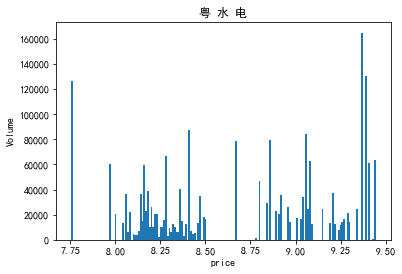

In [1]:
import akshare as ak
import mplfinance as mpf
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt 

from time import time,sleep
from tqdm import tqdm,trange
from stock_stg import *
from stock_plt import *
from basic import *

In [ ]:

grid_chart = plot_stock_echarts('002247')
grid_chart.render_notebook()


In [11]:

class Stocks():
    def __init__(self) -> None:
        self.Time_now = datetime.now()
        while(self.Time_now.weekday()>4): # 周末默认为周五
            self.Time_now -= timedelta(days=1)
        print('current time: ',self.Time_now.strftime("%Y%m%d"))   # 时间检查
        self.Last_7_day = self.Time_now - timedelta(days=7)
        self.A_stocks = get_main_board_stock()
        self.zt_stocks = get_zt_stock(self.Time_now.strftime("%Y%m%d"))

    def zt_industry_info(self):
        stock_today = self.zt_stocks
        x = stock_today['所属行业'].value_counts().index[0:5]
        y = stock_today['所属行业'].value_counts().tolist()[0:5]
        plt.bar(x,y)
        plt.ylabel('涨停个数')
        plt.xlabel('行业')
    
    def zt_candidate_stocks(self,zt_time=1):
        """ 涨停次数，市盈率合适的票
            默认市盈率 0 - 50 ，涨停次数1
        """
        zt_stock_today = self.zt_stocks
        candidate_stock = zt_stock_today[zt_stock_today['连板数']==zt_time]  # 连板次数
        candidate_stock.sort_values(by='首次封板时间',ascending=True,inplace=True)
        candidate_stock = candidate_stock.set_index('代码',drop=False)
        stock_pe_list = []
        for stock_code in tqdm(candidate_stock.index):
            pe = sk.A_stocks[sk.A_stocks['代码']==stock_code]['市盈率-动态'].iloc[0]
            stock_pe_list.append(pe)
        candidate_stock['市盈率-动态'] = stock_pe_list
        candidate_stock = candidate_stock[candidate_stock['市盈率-动态']>0]  # 市盈率筛选
        candidate_stock = candidate_stock[candidate_stock['市盈率-动态']<50]
        candidate_stock = candidate_stock[candidate_stock['总市值']<1e10]   # 市值筛选
        candidate_stock.sort_values(by='市盈率-动态')
        return candidate_stock

sk = Stocks()


current time:  20220330


100%|██████████| 61/61 [00:00<00:00, 1747.48it/s]


,序号,代码,名称,涨跌幅,最新价,成交额,流通市值,总市值,换手率,封板资金,首次封板时间,最后封板时间,炸板次数,涨停统计,连板数,所属行业,市盈率-动态
代码,,,,,,,,,,,,,,,,,
000065,11,000065,北方国际,10.032716,10.09,148428822,6.841625e+09,7.814539e+09,2.200461,70407000,093030,093030,0,1/1,1,工程建设,12.53
601218,12,601218,吉鑫科技,10.020040,5.49,248164268,5.365706e+09,5.365706e+09,4.655765,67656015,093048,093330,2,1/1,1,风电设备,30.45
600605,16,600605,汇通能源,9.977827,9.92,29470883,2.046322e+09,2.046322e+09,1.460660,33401780,093335,093335,0,1/1,1,商业百货,29.13
600367,20,600367,红星发展,10.014306,23.07,315792192,6.717984e+09,6.764969e+09,4.830353,81429902,093841,093841,0,1/1,1,化学原料,37.15
603266,23,603266,天龙股份,10.016420,13.40,37341128,2.649365e+09,2.665082e+09,1.456386,45302237,094302,094302,0,1/1,1,塑料制品,25.98
000863,27,000863,三湘印象,10.047847,4.60,656051808,5.473803e+09,5.635958e+09,12.705275,31262980,094851,102154,1,4/3,1,房地产开,13.13
002116,32,002116,中国海诚,10.011123,9.89,237079338,4.118240e+09,4.130350e+09,5.834989,23340400,095033,100215,4,1/1,1,工程咨询,25.69
000897,35,000897,津滨发展,10.060976,3.61,443571632,5.838253e+09,5.838353e+09,7.853268,54029137,095654,095721,1,1/1,1,房地产开,11.95
600159,37,600159,大龙地产,9.943182,3.87,220909515,3.212113e+09,3.212113e+09,7.115146,31327882,095929,095929,0,1/1,1,房地产开,27.02


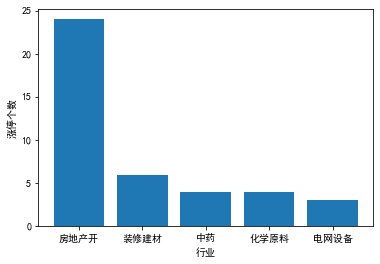

In [12]:
# stocks = sk.zt_candidate_stocks()
stock_today = sk.zt_candidate_stocks()
sk.zt_industry_info()
stock_today

# plot_stocks(exp_stocks['代码'])
# dict(zip(stock_code_list,stock_pe_list))
# candidate_stock = candidate_stock[candidate_stock['代码']==stock_list]
# sk.zt_info()

# stock_today_group = stock_today.groupby(by='所属行业')
# stock_today_group('专用设备')


In [7]:

def find_continue_rise(up_rasing=3,qrr=2,leading_PE=50):
    """ 找到最近10天内连续小阳的票，量比适中，PE适中
        input: up_rasing : int    当日最高涨幅
                qrr : int         当日量比
                leading_PE: int   动态市盈率
        output: stock_candidate ： list   备选股票
    """
    now_time = datetime.now()
    last_day7 = now_time - timedelta(days=10)
    stoch_today = ak.stock_zh_a_spot_em() # 当日股票
    stoch_today = stoch_today[stoch_today['代码'].str[0:2]!='68']  # 去除科创板
    stoch_today = stoch_today[stoch_today['代码'].str[0:2]!='30']  # 去除创业板
    stoch_today = stoch_today[stoch_today['代码'].str[0:1]!='4']  # 去除北京所
    stoch_today = stoch_today[stoch_today['涨跌幅']<up_rasing]  #当天红盘
    stoch_today = stoch_today[stoch_today['涨跌幅']>0]  #当天红盘
    stoch_today = stoch_today[stoch_today['量比']>qrr]  #当天红盘
    stoch_today = stoch_today[stoch_today['市盈率-动态']>0]  #当天红盘
    stoch_today = stoch_today[stoch_today['市盈率-动态']<leading_PE]  #当天红盘
    stoch_today = stoch_today.set_index('代码',drop=False)
    stock_candidate = []
    for stock_code in tqdm(stoch_today['代码']):
        stock_a_hist = ak.stock_zh_a_hist(symbol=stock_code,
                                    period='daily',
                                    start_date=last_day7.strftime("%Y%m%d"),
                                    end_date=now_time.strftime("%Y%m%d"))
        stock_price_lb = stock_a_hist['涨跌幅'] > 0
        stock_price_ub = stock_a_hist['涨跌幅'] < 5
        lb_cnt = stock_price_lb.value_counts()
        ub_cnt = stock_price_ub.value_counts()
        if lb_cnt[True]>stock_price_lb.shape[0]/2 and ub_cnt[True]>stock_price_ub.shape[0]/2:
            stock_candidate.append(stock_code)

    print(stock_candidate)
    return stock_candidate

Date:, 20220330


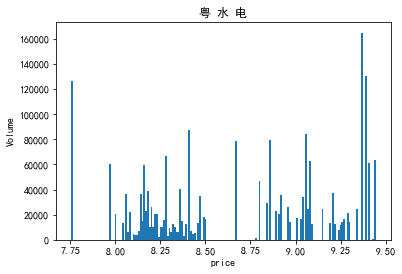

In [2]:

target_price,target_turnover = Stats_stock_min_trade(stock_code='002060')


In [9]:
stock_candidate = find_red3soldier(up_rasing=3,qrr=1,leading_PE=50)


100%|██████████| 265/265 [01:55<00:00,  2.30it/s]

['002726', '600283', '601000', '600803', '002661', '605089', '600328', '600965', '600359', '000930', '002391', '002040', '603722', '600628', '002109', '001201', '600308', '601988', '003000', '002517', '603196', '000990', '603199', '002839', '605108', '600179', '600012', '000417', '002852']


In [ ]:
df = ak.stock_zh_a_hist(symbol='002247',adjust="qfq")
df = df[['日期',"开盘", "收盘", "最低","最高", "成交量"]]  # 注意

In [ ]:
df